## CMPINF-0010-Final-Project

Team Name: Panthers Central

# **The Best Neighborhood Project**

Our assignment was to discover which neighborhood in the city of Pittsburgh is the best.

# **Metric**: 
We decided a good way to determine which neighborhood is the best is to discover which has residents less dependent upon living assistance provided by the city. We were initially going to use the amount household services and the number of arrests in each neighborhood and compare them, but decided to use the total number of fire incidents and crime arrests to be the deciding factor. We chose our metric to be that the higher amount of crimes committed (total amount of crimes and fire incidents) would result in a higher living assistance needed from the city in that neighborhood and vice versa. The best neighborhood would require the least amount of living assistance (least amount of arrests and fires).

First, we printed the first ten rows in this dataset to get an idea of how it was displayed. This allowed us to see that there were several unwanted colomns describing the rate at which incidents happen rather than the quantity of incidents happening. 

In [3]:
import pandas as pd
pgh_arrests=pd.read_csv("https://data.wprdc.org/dataset/bce15079-618a-4bf3-badf-8aa372c3aea2/resource/8ce92a4b-fa62-45c3-8cee-cc58fefede75/download/arrests-for-major-crimes-1972.csv")
pgh_arrests[['neighborhood', 'number_arrests_murder','number_arrests_larceny','number_arrests_rape', 'number_arrests_robbery', 'number_arrests_assault','number_arrests_burglary' ]].head(10)

,neighborhood,number_arrests_murder,number_arrests_larceny,number_arrests_rape,number_arrests_robbery,number_arrests_assault,number_arrests_burglary
0,31st Ward,0,45,1,7,45,55
1,Allegheny Center,0,236,2,24,30,14
2,Allegheny West,1,76,3,16,17,53
3,Allentown,0,45,1,23,41,48
4,Arlington,0,35,0,7,33,44
5,Arlington Heights,0,25,2,14,61,21
6,Banksville,0,50,2,8,8,53
7,Bedford Dwellings,1,19,4,11,25,36
8,Beechview,1,101,1,26,43,84
9,Beltzhoover,1,135,3,63,58,121


To solve this problem we organized the table by removing the excess columns. Only the columns with the quantities of each type of incident were left. Now we have a dataset we can work with!

In [6]:
import pandas as pd
pgh_arrests=pd.read_csv("https://data.wprdc.org/dataset/bce15079-618a-4bf3-badf-8aa372c3aea2/resource/8ce92a4b-fa62-45c3-8cee-cc58fefede75/download/arrests-for-major-crimes-1972.csv")
pgh_arrests['sum_of_reports']=pgh_arrests['number_arrests_murder']+pgh_arrests['number_arrests_larceny']+pgh_arrests['number_arrests_rape']+ pgh_arrests['number_arrests_robbery']+pgh_arrests['number_arrests_assault']+pgh_arrests['number_arrests_burglary']
print(pgh_arrests[['neighborhood','sum_of_reports']].head(30))
pgh_arrests[['neighborhood','sum_of_reports']].tail(40)

                            neighborhood  sum_of_reports
0                              31st Ward             153
1                       Allegheny Center             306
2                         Allegheny West             166
3                              Allentown             158
4                              Arlington             119
5                      Arlington Heights             123
6                             Banksville             121
7                      Bedford Dwellings              96
8                              Beechview             256
9                            Beltzhoover             381
10                            Bloomfield             565
11                               Bon Air              42
12                      Brighton Heights             174
13                             Brookline             321
14                       California Ave.              58
15                               Carrick             308
16                    Central N

,neighborhood,sum_of_reports
30,Homewood North,276
31,Homewood South,595
32,Homewood West,179
33,Knoxville,193
34,Larimer,367
35,Lawrenceville,320
36,Lincoln-Lemington-Belmar,277
37,Lower Lawrenceville,316
38,Lower Oakland,645
39,Manchester,501


Next, we added all the columns with each type of incident (murder, rape, burglary, assault, robbery, and larceny) to get the sum for each neighborhood and created a new column in the dataset called sum_of_arrests. Now we just need to organize. 

In [27]:
import pandas as pd
pgh_arrests=pd.read_csv("https://data.wprdc.org/dataset/bce15079-618a-4bf3-badf-8aa372c3aea2/resource/8ce92a4b-fa62-45c3-8cee-cc58fefede75/download/arrests-for-major-crimes-1972.csv")
pgh_arrests['sum_of_reports']=pgh_arrests['number_arrests_murder']+pgh_arrests['number_arrests_larceny']+pgh_arrests['number_arrests_rape']+ pgh_arrests['number_arrests_robbery']+pgh_arrests['number_arrests_assault']+pgh_arrests['number_arrests_burglary']
amount=pgh_arrests[['neighborhood','sum_of_reports']].sort_values(by='sum_of_reports', ascending=False)
print(amount.head(30))
print(amount.tail(40))

                           neighborhood  sum_of_reports
52                            Shadyside            1229
59      Squirrel Hill - South of Forbes            1066
43                        North Oakland             926
58      Squirrel Hill - North of Forbes             816
16                   Central North Side             728
40                          Middle Hill             710
20                         East Liberty             674
38                        Lower Oakland             645
42  Mount Washington - Duquesne Heights             602
31                       Homewood South             595
10                           Bloomfield             565
64                      Terrace Village             544
55                      Southside Flats             518
39                           Manchester             501
46                          Perry South             496
25                             Garfield             420
65                            The Bluff         

We listed the data from highest incident total to lowest incident total for each neighborhood using the .sort_values() method. The data shows that Shadyside has the highest total with 1226 whereas East Carnegie has the lowest at only 18. Now we can get a better visual of the graph.

We printed bar graph showing the sum of arrests for each neighborhood in Pittsburgh.

AxesSubplot(0.125,0.125;0.775x0.755)


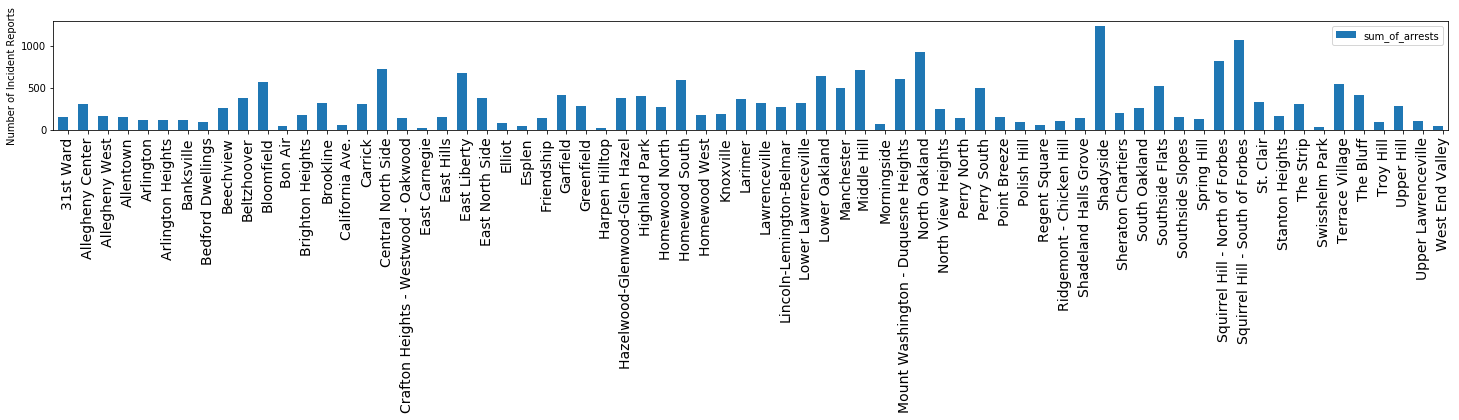

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
pgh_arrests=pd.read_csv("https://data.wprdc.org/dataset/bce15079-618a-4bf3-badf-8aa372c3aea2/resource/8ce92a4b-fa62-45c3-8cee-cc58fefede75/download/arrests-for-major-crimes-1972.csv")
neighborhoods=pgh_arrests['neighborhood']
pgh_arrests['sum_of_arrests']=pgh_arrests['number_arrests_murder']+pgh_arrests['number_arrests_larceny']+pgh_arrests['number_arrests_rape']+ pgh_arrests['number_arrests_robbery']+pgh_arrests['number_arrests_assault']+pgh_arrests['number_arrests_burglary']
pgh_arrests_total=pgh_arrests[['neighborhood','sum_of_arrests']].plot.bar(figsize=(25,2),width=0.5, position=1)
plt.xticks(pgh_arrests.index,pgh_arrests['neighborhood'].values, fontsize=14)
plt.ylabel('Number of Incident Reports')
print(pgh_arrests_total)

# Test Number 2: Number of Fire Incidents 

In [9]:
import pandas as pd
pgh_fires=pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
pgh_fires.head(10)

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
5,F180021782,150.0,"Outside rubbish fire, Other","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",2018-03-12T09:13:28,0,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239
6,F180022495,113.0,"Cooking fire, confined to container","200 BLOCK E OHIO ST, PITTSBURGH PA 15212",2018-03-14T19:46:10,1,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453022,-80.003660
7,F180022546,111.0,Building fire,"7000 BLOCK LEMINGTON AVE, PITTSBURGH PA 15206",2018-03-14T23:49:22,1,231EN15,1203.0,Lincoln-Lemington-Belmar,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-18,40.471358,-79.898240
8,F180022773,111.0,Building fire,"100 BLOCK SPENCER AVE, PITTSBURGH PA 15227",2018-03-15T20:39:05,1,231EN23,2904.0,Carrick,4.0,29.0,4.200329e+10,4.0,29.0,3.0,4-15,40.385494,-79.977200
9,F170044316,131.0,Passenger vehicle fire,"1200 BLOCK WESTFIELD ST, PITTSBURGH PA 15216",2017-06-03T01:31:13,0,231EN28,1916.0,Beechview,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-28,40.415219,-80.019516


First, we printed the first ten rows in this dataset to look at what was stored in it. This dataset has the same problem of unwanted colomn categories.

In [18]:
import pandas as pd
pgh_fires=pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
pgh_fires[['neighborhood', 'type_description']]

,neighborhood,type_description
0,NaN,Building fire
1,NaN,Building fire
2,NaN,Passenger vehicle fire
3,Fineview,Passenger vehicle fire
4,Fairywood,Building fire
5,South Side Flats,"Outside rubbish fire, Other"
6,Allegheny Center,"Cooking fire, confined to container"
7,Lincoln-Lemington-Belmar,Building fire
8,Carrick,Building fire
9,Beechview,Passenger vehicle fire


In [19]:
import pandas as pd
pgh_fires=pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
total_fires=pgh_fires['type_description'].groupby(pgh_fires['neighborhood']).value_counts()
print(total_fires)

neighborhood      type_description                               
Allegheny Center  Cooking fire, confined to container                15
                  Outside rubbish, trash or waste fire                6
                  Dumpster or other outside trash receptacle fire     5
                  Natural vegetation fire, Other                      5
                  Brush or brush-and-grass mixture fire               3
                  Building fire                                       2
                  Special outside fire, Other                         2
                  Trash or rubbish fire, contained                    2
                  Fire in portable building, fixed location           1
                  Fuel burner/boiler malfunction, fire confined       1
                  Mobile property (vehicle) fire, Other               1
                  Outside equipment fire                              1
                  Outside rubbish fire, Other                         

For this data table, we grouped each fire incident type reported with the corresponding neighborhood and summed up each fire incident type listed. I used the the .valuecounts() method to get the number of different fire incidents reported in a neighborhood. Now we need to organize the data so that it can be visualized.

In [20]:
import pandas as pd
pgh_fires=pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
pgh_fires_sum=pgh_fires['type_description'].groupby(pgh_fires['neighborhood']).count()
print(pgh_fires_sum)

neighborhood
Allegheny Center              46
Allegheny West                32
Allentown                     89
Arlington                     39
Arlington Heights              9
Banksville                    49
Bedford Dwellings             31
Beechview                    102
Beltzhoover                   97
Bloomfield                   120
Bluff                         87
Bon Air                       16
Brighton Heights             105
Brookline                    127
California-Kirkbride          31
Carrick                      221
Central Business District    186
Central Lawrenceville         58
Central Northside             95
Central Oakland               69
Chartiers City                11
Chateau                       34
Crafton Heights               66
Crawford-Roberts              77
Duquesne Heights              23
East Allegheny                78
East Carnegie                  6
East Hills                   122
East Liberty                 149
Elliott                       

We grouped the data by neighborhood and listed their respective fire incident total.

In [42]:
import pandas as pd
pgh_fires=pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
pgh_fires_sum=pgh_fires['type_description'].groupby(pgh_fires['neighborhood']).count()
weight=pd.Series([5])
pgh_fires_sum.mul(weight, axis=0) 
print(pgh_fires_sum.sort_values(ascending=False))

neighborhood
Carrick                      221
Central Business District    186
South Side Flats             184
Hazelwood                    183
Squirrel Hill South          179
East Liberty                 149
Homewood North               146
Lincoln-Lemington-Belmar     146
Mount Washington             145
Sheraden                     135
Perry South                  128
Homewood South               128
Brookline                    127
Shadyside                    126
East Hills                   122
Bloomfield                   120
Knoxville                    117
Brighton Heights             105
Larimer                      102
Beechview                    102
Beltzhoover                   97
Marshall-Shadeland            97
Squirrel Hill North           96
Central Northside             95
North Oakland                 92
Allentown                     89
Bluff                         87
Perry North                   83
Greenfield                    82
Spring Hill-City View         

Finally we listed the data in order of highest fire incidents reported to lowest. The dataset reveals that Carrick had the highest with 221 and Mount Oliver Borough had the lowest fire incidents reported with only 4.

AxesSubplot(0.125,0.125;0.775x0.755)


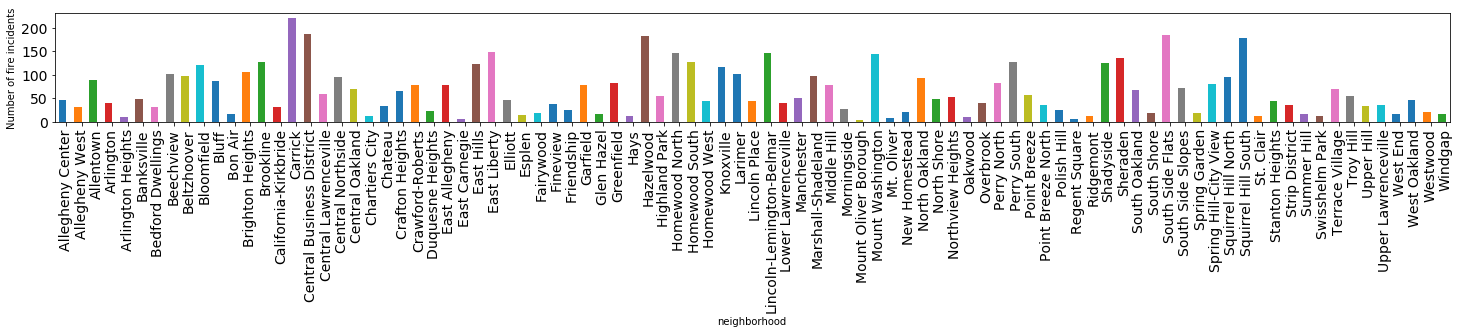

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
pgh_fires=pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
pgh_fires_sum=pgh_fires['type_description'].groupby(pgh_fires['neighborhood']).count()
plt.ylabel('Number of fire incidents')
print(pgh_fires_sum.plot.bar(figsize=(25,2), width=0.5, position=1, fontsize=14))

Finally we're able to neatly visualize the data with a bar graph displaying the different number of fire incidents reported in each Pittsburgh neighborhood.

# Test Number 3: Police Arrests

Once again, we printed the dataset to see what it looks like visually.

In [2]:
import pandas as pd
pgh_police=pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")
pgh_police.head(10)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699
6,1974628,16147655,29.0,M,W,2016-08-16T13:00:00,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.020357,40.400037
7,1974607,16146037,21.0,F,B,2016-08-16T04:25:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",Regent Square,4,1410.0,NaN,NaN,-79.834462,40.398957
8,1974643,16132537,17.0,M,B,2016-08-29T17:55:00,"1400 Block Washington BL Pittsburgh, PA 15206",903 Criminal Conspiracy. / 3701 Robbery.,"N Euclid AV & Broad ST Pittsburgh, PA 15206",East Liberty,5,1115.0,NaN,NaN,0.000000,0.000000
9,1974647,16138646,14.0,M,B,2016-08-23T13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN


Then we grouped each offense for every neighborhood and counted the number of times a neighborhood appeared in the file

In [2]:
import pandas as pd
pgh_police=pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")
pgh_police_sum=pgh_police['OFFENSES'].groupby(pgh_police['INCIDENTNEIGHBORHOOD']).count()
print(pgh_police_sum)

INCIDENTNEIGHBORHOOD
Allegheny Center              674
Allegheny West                 76
Allentown                     553
Arlington                     171
Arlington Heights             101
Banksville                    142
Bedford Dwellings             344
Beechview                     714
Beltzhoover                   319
Bloomfield                    568
Bluff                         802
Bon Air                       130
Brighton Heights              623
Brookline                     710
California-Kirkbride          156
Carrick                      1361
Central Business District    2177
Central Lawrenceville         277
Central North Side            498
Central Northside              23
Central Oakland               309
Chartiers City                 23
Chateau                       271
Crafton Heights               300
Crawford-Roberts              474
Duquesne Heights              103
East Allegheny               1270
East Carnegie                  29
East Hills                 

Next, we sorted the list and saw that Central Business District has the most and Mt. Oliver Neighborhood has the least.

In [12]:
import pandas as pd
pgh_police=pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")
pgh_police_sum=pgh_police['OFFENSES'].groupby(pgh_police['INCIDENTNEIGHBORHOOD']).count()
print(pgh_arrests_sum.sort_values(ascending=False))

INCIDENTNEIGHBORHOOD
Central Business District      2177
South Side Flats               1970
Carrick                        1361
East Allegheny                 1270
Homewood South                 1167
Homewood North                 1054
East Liberty                   1013
Marshall-Shadeland              868
Mount Washington                853
Bluff                           802
Knoxville                       770
Hazelwood                       718
Beechview                       714
Brookline                       710
Lincoln-Lemington-Belmar        703
Allegheny Center                674
Sheraden                        666
Perry South                     648
Brighton Heights                623
East Hills                      588
Middle Hill                     577
Bloomfield                      568
Allentown                       553
Shadyside                       551
Fineview                        503
Central North Side              498
North Shore                     480
Crawfor

Bar Graph visually displaying the data

AxesSubplot(0.125,0.125;0.775x0.755)


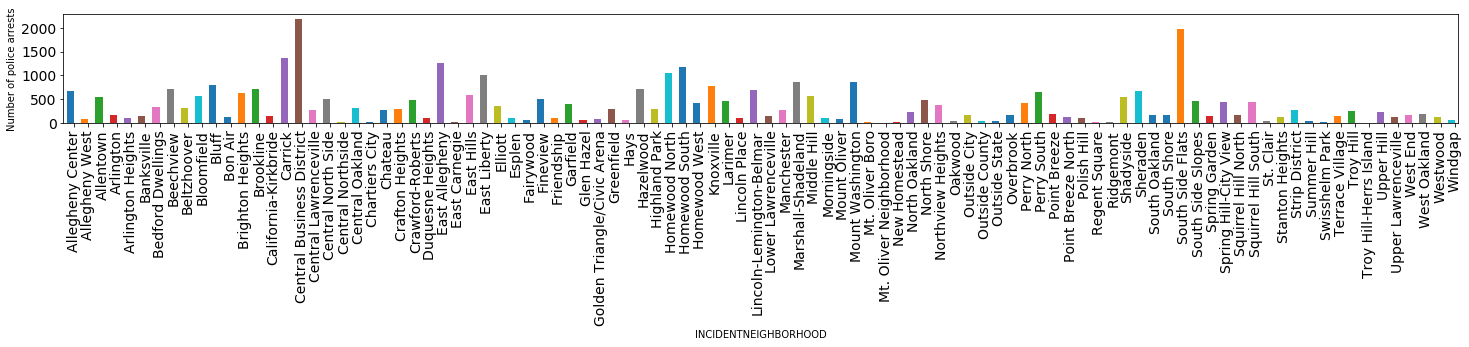

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
pgh_police=pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")
pgh_police_sum=pgh_police['OFFENSES'].groupby(pgh_police['INCIDENTNEIGHBORHOOD']).count()
plt.ylabel('Number of police arrests')
print(pgh_police_sum.plot.bar(figsize=(25,2), width=0.5, position=1, fontsize=14))

# *The Best Neighborhood*
To determine which neighborhood is truly the best, we added weights to the fire and police arrest data by mutiplying the fire incident dataset (pgh_fires) by five and dividing the police arrests (pgh_police) by two. This allowed us to compensate for the newer datasets with less datapoints than the others. The Best neighborhood ended up being East Carnegie with 62.5 points. Although East Carnegie didn't have the lowest number of points it did have the lowest number of points out of any neighborhood in all three datasets. This means that East Carnegie is one of if not the safest neighborhood in Pittsburgh. The worst neighborhood in Pittsburgh according to these datasets is Squirrel Hill South with 2191.5 points. As the only neighborhood in all three datasets with a score this high with top ten apperances in fires and reports Squirrel Hill has earned the title of "least safe neighborhood in Pittsburgh". However, surprisingly while only being in two datsets the Central Business District is in a close second with 2033 points. While we only counted the neighborhoods in all three datasets because we were looking for the best neighborhood and having missing data would be a huge advantage in that category, it's clear to see the Central Business District is the actual worst neighborhood in Pittsburgh.

Below we implemented the weight to the fire and police arrest data and printed the new updated list sorted for the two datasets and printed the graphs for all three datasets and the list for police incident report.

In [25]:
import pandas as pd
pgh_police=pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")
pgh_police_sum=pgh_police['OFFENSES'].groupby(pgh_police['INCIDENTNEIGHBORHOOD']).count().apply(lambda x: x*0.5).sort_values(ascending=False)
print(pgh_police_sum)

INCIDENTNEIGHBORHOOD
Central Business District      1088.5
South Side Flats                985.0
Carrick                         680.5
East Allegheny                  635.0
Homewood South                  583.5
Homewood North                  527.0
East Liberty                    506.5
Marshall-Shadeland              434.0
Mount Washington                426.5
Bluff                           401.0
Knoxville                       385.0
Hazelwood                       359.0
Beechview                       357.0
Brookline                       355.0
Lincoln-Lemington-Belmar        351.5
Allegheny Center                337.0
Sheraden                        333.0
Perry South                     324.0
Brighton Heights                311.5
East Hills                      294.0
Middle Hill                     288.5
Bloomfield                      284.0
Allentown                       276.5
Shadyside                       275.5
Fineview                        251.5
Central North Side           

In [26]:
import pandas as pd
pgh_fires=pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
pgh_fires_sum=pgh_fires['type_description'].groupby(pgh_fires['neighborhood']).count().apply(lambda x: x*5).sort_values(ascending=False)
print(pgh_fires_sum)

neighborhood
Carrick                      1110
Central Business District     945
South Side Flats              930
Hazelwood                     915
Squirrel Hill South           900
East Liberty                  750
Lincoln-Lemington-Belmar      735
Mount Washington              730
Homewood North                730
Sheraden                      675
Shadyside                     645
Perry South                   640
Homewood South                640
Brookline                     635
East Hills                    610
Bloomfield                    600
Knoxville                     590
Brighton Heights              525
Beechview                     515
Larimer                       510
Marshall-Shadeland            485
Beltzhoover                   485
Squirrel Hill North           480
Central Northside             480
North Oakland                 465
Allentown                     445
Bluff                         440
Perry North                   420
Greenfield                    410
M

In [1]:
import pandas as pd
pgh_arrests=pd.read_csv("https://data.wprdc.org/dataset/bce15079-618a-4bf3-badf-8aa372c3aea2/resource/8ce92a4b-fa62-45c3-8cee-cc58fefede75/download/arrests-for-major-crimes-1972.csv")
pgh_arrests['sum_of_reports']=pgh_arrests['number_arrests_murder']+pgh_arrests['number_arrests_larceny']+pgh_arrests['number_arrests_rape']+ pgh_arrests['number_arrests_robbery']+pgh_arrests['number_arrests_assault']+pgh_arrests['number_arrests_burglary']
amount=pgh_arrests[['neighborhood','sum_of_reports']].sort_values(by='sum_of_reports', ascending=False)
print(amount.head(10))
print(amount.tail(10))

                           neighborhood  sum_of_reports
52                            Shadyside            1229
59      Squirrel Hill - South of Forbes            1066
43                        North Oakland             926
58      Squirrel Hill - North of Forbes             816
16                   Central North Side             728
40                          Middle Hill             710
20                         East Liberty             674
38                        Lower Oakland             645
42  Mount Washington - Duquesne Heights             602
31                       Homewood South             595
       neighborhood  sum_of_reports
22           Elliot              84
41      Morningside              76
14  California Ave.              58
49    Regent Square              55
69  West End Valley              46
23           Esplen              43
11          Bon Air              42
63   Swisshelm Park              35
27   Harpen Hilltop              23
18    East Carnegie     

AxesSubplot(0.125,0.125;0.775x0.755)


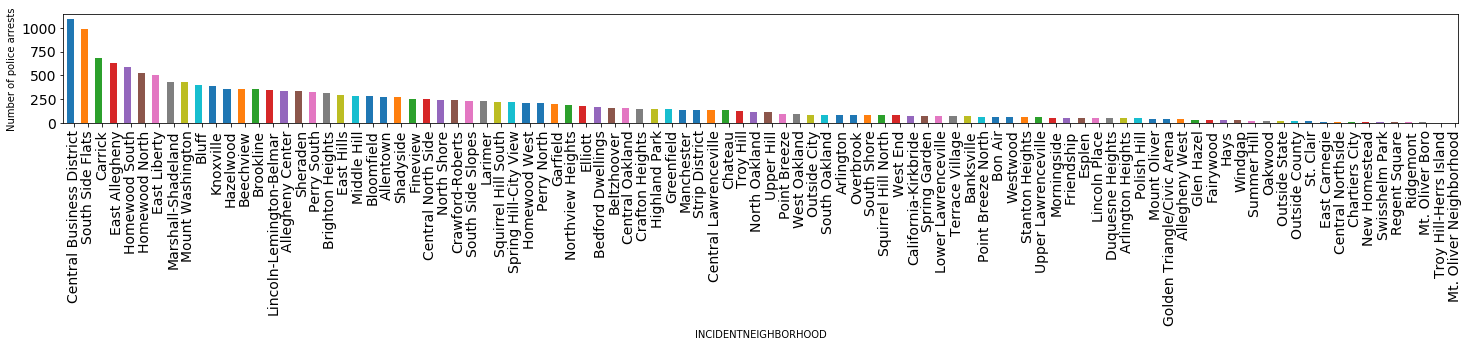

In [34]:
import pandas as pd
pgh_police=pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")
pgh_police_sum=pgh_police['OFFENSES'].groupby(pgh_police['INCIDENTNEIGHBORHOOD']).count().apply(lambda x: x*0.5).sort_values(ascending=False)
plt.ylabel('Number of police arrests')
print(pgh_police_sum.plot.bar(figsize=(25,2), width=0.5, position=1, fontsize=14))

AxesSubplot(0.125,0.125;0.775x0.755)


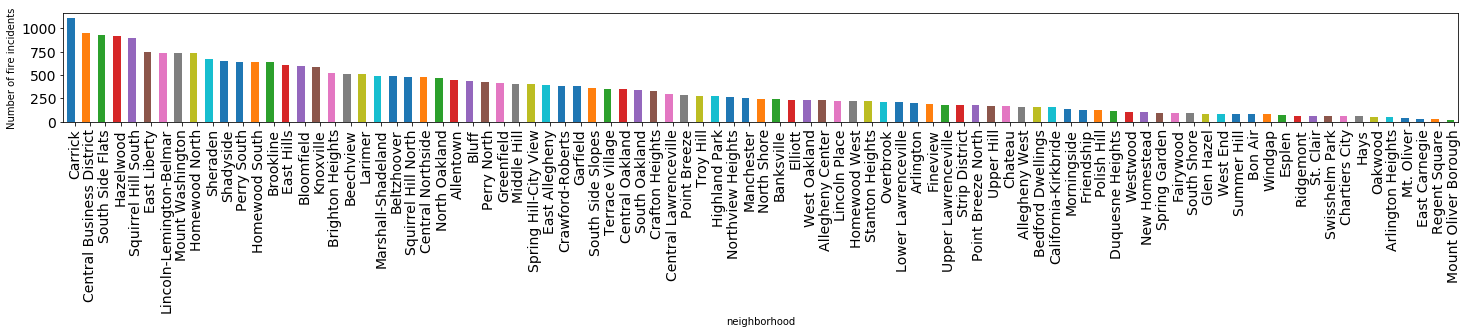

In [35]:
import pandas as pd
pgh_fires=pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
pgh_fires_sum=pgh_fires['type_description'].groupby(pgh_fires['neighborhood']).count().apply(lambda x: x*5).sort_values(ascending=False)
plt.ylabel('Number of fire incidents')
print(pgh_fires_sum.plot.bar(figsize=(25,2), width=0.5, position=1, fontsize=14))

AxesSubplot(0.125,0.125;0.775x0.755)


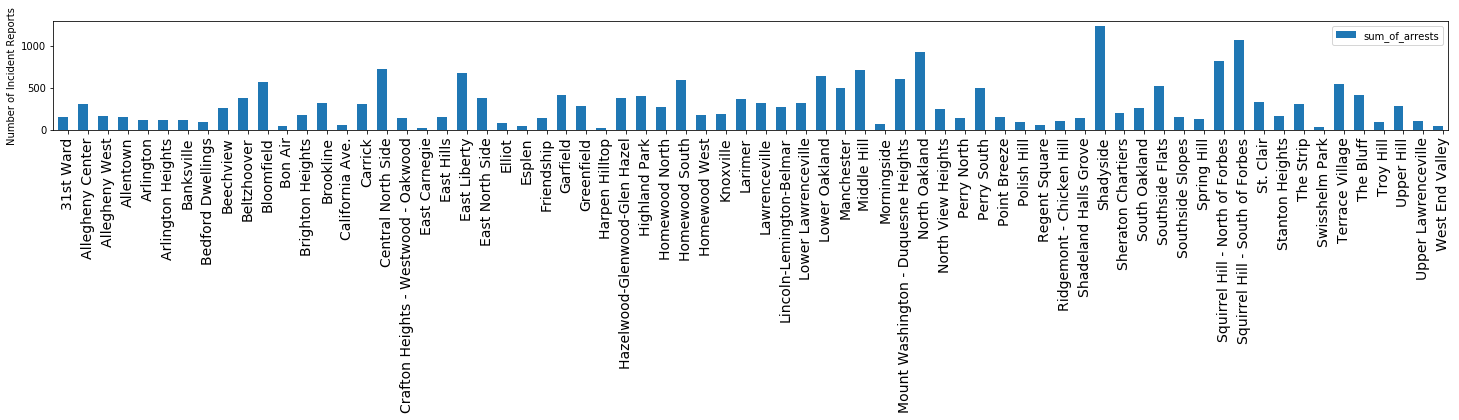

In [36]:
import pandas as pd
pgh_arrests=pd.read_csv("https://data.wprdc.org/dataset/bce15079-618a-4bf3-badf-8aa372c3aea2/resource/8ce92a4b-fa62-45c3-8cee-cc58fefede75/download/arrests-for-major-crimes-1972.csv")
neighborhoods=pgh_arrests['neighborhood']
pgh_arrests['sum_of_arrests']=pgh_arrests['number_arrests_murder']+pgh_arrests['number_arrests_larceny']+pgh_arrests['number_arrests_rape']+ pgh_arrests['number_arrests_robbery']+pgh_arrests['number_arrests_assault']+pgh_arrests['number_arrests_burglary']
pgh_arrests_total=pgh_arrests[['neighborhood','sum_of_arrests']].plot.bar(figsize=(25,2),width=0.5, position=1)
plt.xticks(pgh_arrests.index,pgh_arrests['neighborhood'].values, fontsize=14)
plt.ylabel('Number of Incident Reports')
print(pgh_arrests_total)

# Personal Reflections

Janet's Conclusion: The data that was shown to be the best neighborhood did not have an impact on my opinion of the best Pittsburgh neighborhood. Being from Maryland, I do not have any experience with the city of Pittsburgh neighborhoods, in regards to which is the safest. I also have not had the chance to vivist much of Pittsburgh outside of Oakland to trult give an adequate prediction. However,  when East Carnegie came out as the winner I was not surprised because on websites such as Niche.com, it comes up as one of the safest neighborhoods. I thought Downtown Pittsburgh would also be shown in our data as the best as I have heard good things about this place, but our datafiles did not include this neighborhood in their studies. I also thought Shadyside would also be considered as the best because when I visied it looked like a nice place. If I had to do this project again, I would have used more interesting datasets and maybe connect them to a different metric. I do hear occasionally about crimes done in Pittburgh, but I did not know in which neighborhood it came from so I cannot form previous opinions or have a bias towards any one neighborhood.

Simon's Conclusion: After comparing multiple factors, we determined that East Carnegie was the Best neighborhood due to its low rates of crime fires and incidents. Being from Philadelphia I had no idea which neighborhoods would come out on top. However, after comparing almost every neighborhood in Pittsburgh East Carnegie was found in the top ten lowest fires, crime and incidents. No other neighborhood did that. The metric of city services needed, meaning police or firefighters was catered to one of the top concerns for home buyers, safety. The worst neighborhood we analyzed was Squirrel Hill South. Although it never took the number one spot in any of the categories Squirrel Hill South was in both top ten fire incidents and incident reports. Being one of the only neighborhoods with over one thousand crime incident reports and over one hundred fire incidents. Initially when I saw Shadyside’s crime incident reports with over two-hundred more incidents than the second worst neighborhood I thought that it was going to be the worst neighborhood. However, having been to Shadyside I know that it’s a really nice place. This is because the dataset included reports which may happen more often than actual incidents. It is possible that because it’s a nicer neighborhood the community is more vigilant about reporting things. If I were to change anything about the way we did this project, I would choose more diverse metrics. We chose to have a focus on safety which is a top concern for most people when choosing where to live but more diverse data sets would give a better picture of the overall best neighborhood rather than just the safest.

Kyle’s Conclusion: The data driven determination of “best neighborhood” is different from my personal favorite, mainly because I’ve hardly left Oakland since arriving here from a suburban area in Mechanicsburg, Pennsylvania. I’ve also never been to East Carnegie, so I really have no idea if I would consider it the best or not. Right now, my favorite neighborhood is North Oakland by default because it’s all I really know. Maybe this will change in the future, who knows. At least now I have some idea of what some of the better neighborhoods are. However, most of what people did related to safety, housing, and playgrounds, not where a college kid can go to have some fun. So, my favorite neighborhood might not necessarily correlate with the “best” one that our datasets determined. This is because in the case of our project, “best” really means “safe”, whereas I might care less about “safe” and more about “fun”.

# Datasets Used:
Link to Dataset 1: https://data.wprdc.org/dataset/a-community-profile-of-pittsburgh-neighborhoods-1974/resource/8ce92a4b-fa62-45c3-8cee-cc58fefede75

Link to Dataset 2: https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh/resource/8d76ac6b-5ae8-4428-82a4-043130d17b02/view/ac72829e-0dba-4997-8dc6-0503b7dc6487#

Link to Dataset 3: https://data.wprdc.org/dataset/arrest-data

## Thank you for reading and using Panthers Central as your data analyzing tool :)